
# Project: Investigate a Dataset (TMDb Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I've been always a big fan of movies and cinemas, I used to go to the cinemas almost weekly not long ago. So when I saw this specific dataset, I got very excited doing some analysis on one of my favorite things, this will make it even more interesting.

> The dataset consists of 10,866 movies, with many columns (Name, budget, revenue, cast...)

> There are many many analysis that can be done on this dataset, like: What is the average budget and revenue per year? Most genre used, most featured actors? Correlation between budget and user rating?

> I am sure there will be many interesting things to explore in this dataset

In [31]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [32]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("tmdb-movies.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> There are 10,866 rows, so there should be 10,866 entries in each column. However, as expected not all columns have values, so lets check whether we will depend on these rows, or they can be neglected.

> The columns that have missing data and not needed in my analysis (therefore will be dropped) are:
- imdb_id
- homepage
- tagline
- keywords
- overview

> For budget and revenue, since we have the last 2 columns "budget_adj" and "revenue_adj" which show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time, which makes more sense to use to have a fair judgement on all movies. Therefore I will also drop the below 2 columns although they don't have any missing data:
- budget
- revenue

> Also, column "id" won't be of any use in my analysis, therefore will be dropped

> All duplicated rows will be removed

> Delete rows having columns with empty values

> Delete rows having runtime = 0, because it is not logic for a movie

> Add a new column for Profit = revenue_adj - budget_adj

### Data Cleaning

In [33]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Columns to be deleted
del_col=["imdb_id", "homepage", "tagline", "keywords", "overview", "budget", "revenue", "id"]

#Delete unneeded columns indicated above, 1 indicates to delete columns not rows
df_clean= df.drop(del_col,1)

#Check duplicated rows
sum(df_clean.duplicated())

#Delete duplicated rows (Only 1 row)
df_clean=df_clean.drop_duplicates()

#Delete rows having any column with empty values
df_clean.dropna(how="any", inplace=True)

#Delete rows having zero values for "runtime" column, as it doesn't make any sense
df_clean = df_clean.drop(df_clean[df_clean.runtime == 0].index)

#Checking no null values
sum(df_clean.runtime.isnull())

#Create profit column (Revenue - Budget)
df_clean.insert(13,"profit",df_clean["revenue_adj"]-df_clean["budget_adj"])

#Check all columns have the same number of entries
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9759 non-null float64
original_title          9759 non-null object
cast                    9759 non-null object
director                9759 non-null object
runtime                 9759 non-null int64
genres                  9759 non-null object
production_companies    9759 non-null object
release_date            9759 non-null object
vote_count              9759 non-null int64
vote_average            9759 non-null float64
release_year            9759 non-null int64
budget_adj              9759 non-null float64
revenue_adj             9759 non-null float64
profit                  9759 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Average budget/revenue/profit per year)
Analysing the average budget, revenue, profit per year progress

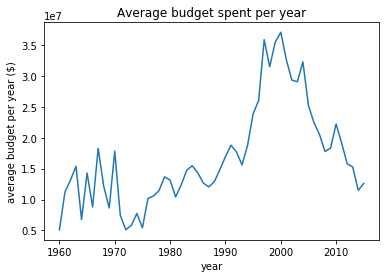

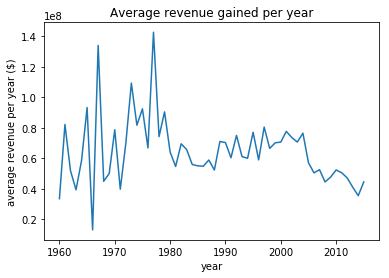

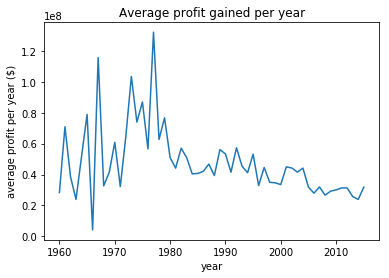

In [34]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#Calculate average budget per year
plt.plot(df_clean.groupby("release_year").mean().budget_adj);
plt.xlabel("year");
plt.ylabel("average budget per year ($)");
plt.title("Average budget spent per year")
plt.show()

#Calculate average revenue per year
plt2.plot(df_clean.groupby("release_year").mean().revenue_adj);
plt2.xlabel("year");
plt2.ylabel("average revenue per year ($)");
plt2.title("Average revenue gained per year")
plt2.show()

#Calculate average profit per year
plt3.plot(df_clean.groupby("release_year").mean().profit);
plt3.xlabel("year");
plt3.ylabel("average profit per year ($)");
plt3.title("Average profit gained per year")
plt3.show()

**Question 1 plots analysis:**

> Average budget per year faced a huge rise for the period 1995-2008 with almost no change in revenue in the same period. Profit has been decreasing since 1980


### Research Question 2  (Most Genre made, Actors featured)

Just simple statistics on the most used Genre in movies, the most featured actors in movies


In [35]:
#define a function that parses data according to an input separator
def cut_data(data, separator):
    data_cut = data.str.cat(sep = separator)
    data_cut = pd.Series(data_cut.split(separator))
    return data_cut.value_counts()

#Calculate most genres made
count = cut_data(df_clean["genres"], "|")
print("\n Most genre used in movies: \n")
print(count[:4])

#Calculate most featured actors
count = cut_data(df_clean["cast"], "|")
print("\n Most featured actors in movies: \n")
print(count[:4])

#Calculate the directors with most revenues
print("\n Directors associated with highest revenues: \n")
print(df_clean.groupby("director").sum().revenue_adj.sort_values(ascending=False).head());


 Most genre used in movies: 

Drama       4362
Comedy      3429
Thriller    2744
Action      2234
dtype: int64

 Most featured actors in movies: 

Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
dtype: int64

 Directors associated with highest revenues: 

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Name: revenue_adj, dtype: float64


**Question 2 plots analysis:**

> Drama is the most used Genre in Movies all-time, it's not my favorite but it seems to be the people's favorite.

> A great actor like Robert De Niro is the most featured actor in movies.

> Steven Spielberg is the director associated with highest revenues, I can't even count the number of great movies he has directed!


### Research Question 3  (Rating/Budget analysis)

Analyzing how much the budget spent on movies affect the vote of audience

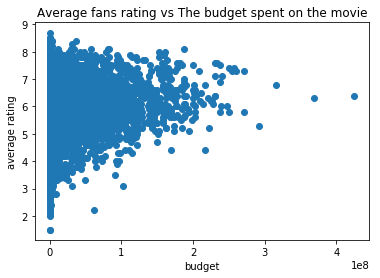

In [36]:
#Scatter plot the budget against the average vote
plt.scatter(df_clean["budget_adj"],df_clean["vote_average"]);
plt.xlabel("budget");
plt.ylabel("average rating");
plt.title("Average fans rating vs The budget spent on the movie")
plt.show()

**Question 3 plot analysis:**

> It can be seen that most of the high budget movies, don't achieve a high fans' rating compared to low budget movies. The highest budget movie achieved a rating of almost 6 which is not enough for a big spent budget.


### Research Question 4  (Runtime over the years)

Analyzing if the movie runtime changes over the years?

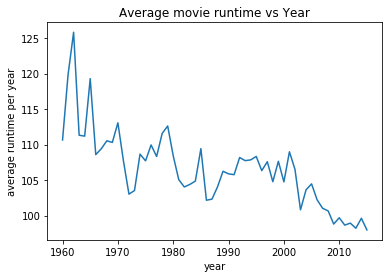

In [37]:
#Plotting average runtime per year
plt.plot(df_clean.groupby("release_year").mean().runtime);
plt.xlabel("year");
plt.ylabel("average runtime per year");
plt.title("Average movie runtime vs Year")
plt.show()

**Question 4 plot analysis:**

> It seems that movies are in continuous decrease of runtime, movies are getting shorter and shorter, and the trend doesn't seem to stabilize anytime soon.

<a id='conclusions'></a>
## Conclusions

> **Conclusion 1**: Profits has decreased compared to the early 60s-80s, because budget has significantly increased with no corresponding increase in revenue

> **Conclusion 2**: "Drama" is the most Genre used in movies, "Robert De Niro" is the most featured actors in movies, "Steven Spielberg" is the director having highest revenue movies.

> **Conclusion 3**: It can be concluded from the scattered plot that increasing the budget doesn't necessarily lead to increased fans vote, majority of high budget movies have lower rating. It's not only about money afterall!

> **Conclusion 4**: Average runtime of a movies has been continuously decreasing through the years! Hopefully this trend will stop decreasing one day..

## Limitations

> * Many rows had some empty values and had to be dropped (No. of rows decreased from 10866 to 9759), this deleted data may have biased analysis differently if it had correct values

> * There were too many missing "production_companies", so analysis on production companies would give false results so I had to ignore it.

> * The ZERO budget movies gives misleading analysis when I need to check the fans rating compared to the budget spent on the movie


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0